<a href="https://colab.research.google.com/github/MuhammadBilal848/Deep-Learning-Practice/blob/main/Data%20Augmentation%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
import cv2 as cv
import tensorflow as tf
from tensorflow import keras
import os
import pathlib
from sklearn.model_selection import train_test_split

In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/datasets/flower_photos'
data = pathlib.Path(path) # this converts the data path into windows path
data

PosixPath('/content/drive/MyDrive/Colab Notebooks/datasets/flower_photos')

In [5]:
images = list(data.glob('*/*.jpg')) # this returns the list of all the images available by going into directories n subdirectories.
img_count = len(list(data.glob('*/*.jpg'))) 

In [6]:
flowers_dict = {
              'roses':list(data.glob('roses/*')),
              'daisy':list(data.glob('daisy/*')),
              'dandelion':list(data.glob('dandelion/*')),
              'sunflowers':list(data.glob('sunflowers/*')),
              'tulips':list(data.glob('tulips/*'))  
               }
flowers_name = {
              'roses':0,
              'daisy':1,
              'dandelion':2,
              'sunflowers':3,
              'tulips':4  
               }

In [7]:
x , y = [] , []
for name,flower in flowers_dict.items():
  for flov in flower:
    img = cv.imread(str(flov))
    resize = cv.resize(img, (200,200))
    x.append(resize)
    y.append(flowers_name[name])

(<matplotlib.image.AxesImage at 0x7f1477201d30>, 1)

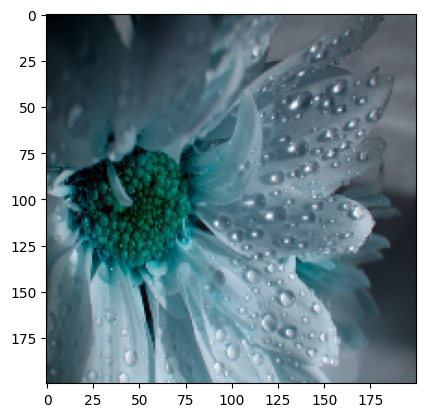

In [8]:
plt.imshow(x[1000]),y[1000]

In [9]:
x = np.array(x)
y = np.array(y)

In [10]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size=0.2)

In [11]:
xtrain = xtrain/255
xtest = xtest/255

In [12]:
zoom = keras.Sequential([
          keras.layers.experimental.preprocessing.RandomZoom(0.6) # randomly zoom on an image
])

(-0.5, 199.5, 199.5, -0.5)

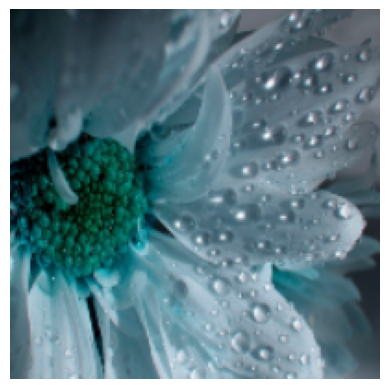

In [13]:
zoomimg = zoom(x).numpy().astype('uint8')
plt.imshow(zoomimg[1000])
plt.axis('off')

In [15]:
model = keras.Sequential([
            zoom,
            keras.layers.Conv2D(16,(3,3),activation = 'relu'),
            keras.layers.MaxPool2D(),
            keras.layers.Conv2D(32,(3,3),activation = 'relu'),
            keras.layers.MaxPool2D(),
            keras.layers.Conv2D(64,(3,3),activation = 'relu'),
            keras.layers.MaxPool2D(),
            keras.layers.Dropout(0.3),
            keras.layers.Flatten(),
            keras.layers.Dense(20,activation = 'relu'),
            keras.layers.Dense(5,activation = 'softmax') # 5 units bcz we have 5 classes of flower.
])

model.compile(optimizer = 'adam',loss=keras.losses.SparseCategoricalCrossentropy(),metrics = 'Accuracy')
model.fit(xtrain,ytrain,epochs = 10)

Epoch 1/10
92/92 [==============================] - 129s 1s/step - loss: 1.5203 - Accuracy: 0.2715
Epoch 2/10
92/92 [==============================] - 130s 1s/step - loss: 1.2253 - Accuracy: 0.4935
Epoch 3/10
92/92 [==============================] - 128s 1s/step - loss: 1.0898 - Accuracy: 0.5671
Epoch 4/10
92/92 [==============================] - 128s 1s/step - loss: 1.0024 - Accuracy: 0.6056
Epoch 5/10
92/92 [==============================] - 129s 1s/step - loss: 0.9408 - Accuracy: 0.6342
Epoch 6/10
92/92 [==============================] - 126s 1s/step - loss: 0.8998 - Accuracy: 0.6560
Epoch 7/10
92/92 [==============================] - 131s 1s/step - loss: 0.8268 - Accuracy: 0.6826
Epoch 8/10
92/92 [==============================] - 128s 1s/step - loss: 0.8247 - Accuracy: 0.6788
Epoch 9/10
92/92 [==============================] - 128s 1s/step - loss: 0.7603 - Accuracy: 0.7105
Epoch 10/10
92/92 [==============================] - 127s 1s/step - loss: 0.7307 - Accuracy: 0.7316


In [16]:
model.evaluate(xtest,ytest)

23/23 [==============================] - 8s 337ms/step - loss: 0.8580 - Accuracy: 0.6935


[0.8580151796340942, 0.6934604644775391]

# We can see that the accuracy is increased overcoming overfitting when we added an augmentation & dropout.
# Accuracy can further be increased when we apply different augmentation & dropout.
## [0.8580151796340942, 0.6934604644775391]